In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# generate a canonical (mean=1) list of exponential random variables
def randExp(N = 1):
    return -np.log(np.random.uniform(0.,1.,N))

In [5]:
# generate a list of arrival times for the Poisson process with integrated rate function inverse: irfi
def poissonProcess(irfi, T):
    t = 0
    ts = []
    yc = 0
    while (t<T):
        yc += randExp()
        t = irfi(yc)
        ts.extend(t)
    return ts[:-1]

In [6]:
# the integrated rate function inverse corresponding to f(t) = 60*(t-1)^2
def exampleNonHomogenousIRFI(y):
    s = np.sign(y-20)
    t = s*abs((y-20)/20)**(1./3.)+1
    return t

In [7]:
# the integrated rate function inverse corresponding to f(t) = 20
def exampleHomogenousIRFI(y):
    t = y/20
    return t

In [8]:
def plotPoissonProcess(pp, T):
    tt = np.linspace(0,T,1001)
    pps = 0*tt
    for t in pp:
        pps[tt>t] += 1
    plt.plot(tt,pps)
    plt.xlabel('time axis')
    plt.ylabel('event counter')
    plt.show()

In [10]:
T = 2

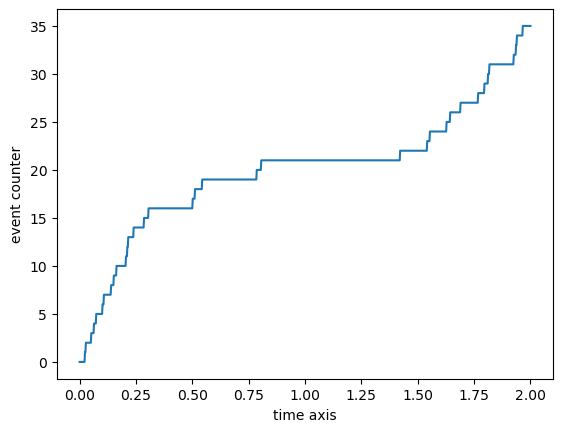

In [11]:
ppn = poissonProcess(exampleNonHomogenousIRFI, T)
plotPoissonProcess(ppn, T)

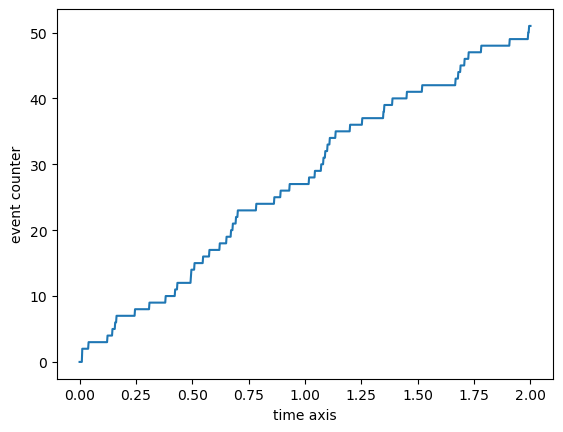

In [12]:
pph = poissonProcess(exampleHomogenousIRFI, T)
plotPoissonProcess(pph, T)
